In [1]:
import findspark
findspark.init('/opt/cloudera/parcels/SPARK2-2.3.0.cloudera3-1.cdh5.13.3.p0.458809/lib/spark2')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('regresion_lineal_simple').getOrCreate()
import pandas

In [2]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pandas.tools.plotting import scatter_matrix
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np


In [4]:
trainning = spark.read.csv("/user/epinedac/datasets/calificacion", header=True, nullValue="?", inferSchema=True)
trainning.show()

+-------------+------------+
|horas_estudio|calificacion|
+-------------+------------+
|            6|          11|
|           13|          19|
|            8|          14|
|            9|          14|
|           11|          16|
|           10|          15|
|            7|          13|
|           10|          17|
+-------------+------------+



In [7]:
ufos_df = trainning.toPandas()


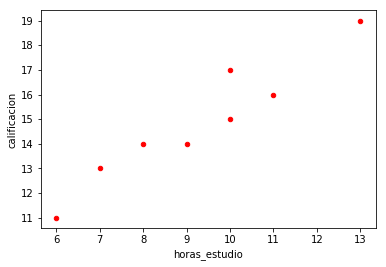

In [8]:
ufos_df.plot.scatter(x='horas_estudio', y='calificacion', color='Red')

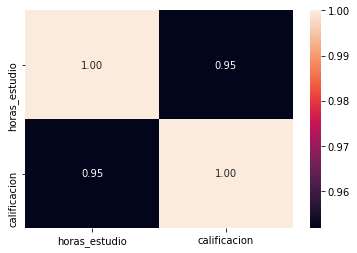

In [9]:
import seaborn as sns

spearman_corr = ufos_df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, fmt=".2f")

In [10]:
assembler = VectorAssembler(inputCols=["horas_estudio"], outputCol="features")
assem_data = assembler.transform(trainning)
assem_data.show()

+-------------+------------+--------+
|horas_estudio|calificacion|features|
+-------------+------------+--------+
|            6|          11|   [6.0]|
|           13|          19|  [13.0]|
|            8|          14|   [8.0]|
|            9|          14|   [9.0]|
|           11|          16|  [11.0]|
|           10|          15|  [10.0]|
|            7|          13|   [7.0]|
|           10|          17|  [10.0]|
+-------------+------------+--------+



In [11]:
lr = LinearRegression(featuresCol="features",labelCol="calificacion",predictionCol='prediction')
lrModel=lr.fit(assem_data)
# obtenemos los coeficentes
lrModel.coefficients

# Indica que por cada hora de estudio, tus calificaciones pueden aumentar en 1.04

DenseVector([1.0493])

In [ ]:
prediciton=lrModel.transform(assem_data)


In [12]:
lrModel.intercept

# Si la persona no estudia nada su calificación sería de 5

5.169014084507031

In [13]:
trainning_summary=lrModel.summary
trainning_summary.r2

0.9116330636882519

In [5]:
spark.stop()